# Acne Segmentation and Classification Model
- **Architecture**: U-Net with ResNet-34 backbone 


C:\Users\rihem\AppData\Local\Temp\ipykernel_18960\3722181641.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(MODEL_PATH)


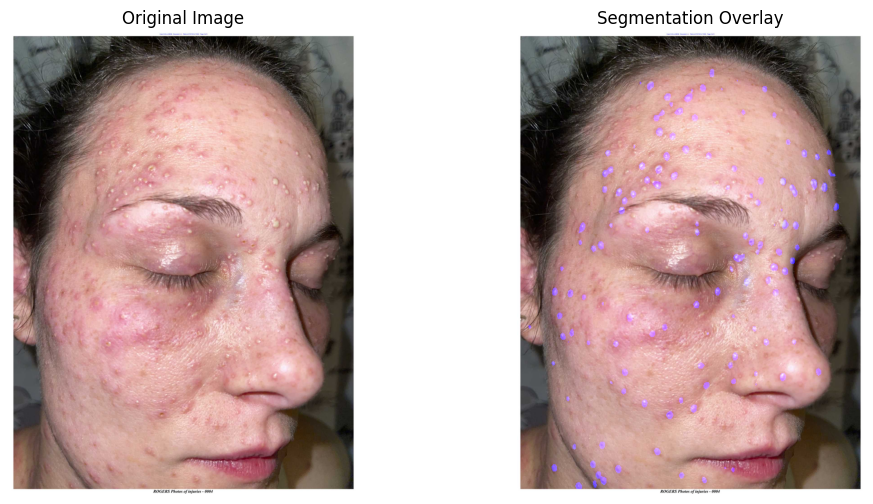

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from albumentations import Compose, Normalize, Resize
from albumentations.pytorch import ToTensorV2

# ----------------- CONFIGURATION -----------------
MODEL_PATH = "Acnes_model.pth"  
MASK_OPACITY = 0.9  
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------- LOAD THE MODEL -----------------
# Load the entire model
model = torch.load(MODEL_PATH)
model.to(DEVICE)
model.eval()  #

# ----------------- IMAGE PREPROCESSING -----------------
def preprocess_image(image_path, img_size=(256, 256)):
    """
    Load an image, resize it, normalize it, and convert it to a PyTorch tensor.
    """
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

    transform = Compose([
        Resize(*img_size),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    augmented = transform(image=image)
    tensor_image = augmented["image"].unsqueeze(0)  
    return tensor_image, image  

# ----------------- RUN INFERENCE -----------------
def predict_mask(model, image_tensor):
    """
    Run the trained model on the input image tensor and return the predicted mask.
    """
    with torch.no_grad():
        image_tensor = image_tensor.to(DEVICE)
        output = model(image_tensor)  
        mask = torch.sigmoid(output)  
        mask = mask.squeeze().cpu().numpy()  
        return mask

# ----------------- OVERLAY MASK ON IMAGE -----------------
def overlay_mask(image, mask, color=(255, 0, 0), alpha=MASK_OPACITY):
    """
    Overlay the segmentation mask on the original image with transparency.
    Args:
        image (np.array): Original image (H, W, 3)
        mask (np.array): Binary mask (H, W)
        color (tuple): RGB color for mask
        alpha (float): Opacity of mask (0 = transparent, 1 = solid)
    Returns:
        Blended image with mask overlay
    """
   
    mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    overlay = image.copy()
    mask_colored = np.zeros_like(image, dtype=np.uint8)
    mask_colored[mask_resized == 1] = color  


    blended = cv2.addWeighted(overlay, 1, mask_colored, alpha, 0)
    return blended

# ----------------- PREDICT AND DISPLAY RESULT -----------------
def process_image(image_path):
    """
    Process the image, predict the mask, and display the results.
    """
 
    input_tensor, original_image = preprocess_image(image_path)
    
   
    predicted_mask = predict_mask(model, input_tensor)
    
    
    binary_predicted_mask = (predicted_mask > 0.3).astype(np.uint8)
    
  
    overlayed_image = overlay_mask(original_image, binary_predicted_mask, color=(0, 0, 255), alpha=MASK_OPACITY)
    
    # Display  results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original_image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(overlayed_image)
    ax[1].set_title("Segmentation Overlay")
    ax[1].axis("off")
    
    plt.show()

# -----------------IMAGE INPUT -----------------
image_path = "rawImage.jpg"  
process_image(image_path)


# Acne Segmentation + Classification
#Overview
Acne Severity Detection Model :
This model card provides documentation for the Acne Severity Detection model checkpoint used in the Hugging Face pipeline. The model is designed to assess acne severity levels, ranging from clear skin to very severe acne.
link : https://huggingface.co/imfarzanansari/skintelligent-acne

<img src="image.png" width="550" height="300" />



C:\Users\rihem\AppData\Local\Temp\ipykernel_18960\3460446797.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(MODEL_PATH)
Device set to use cpu


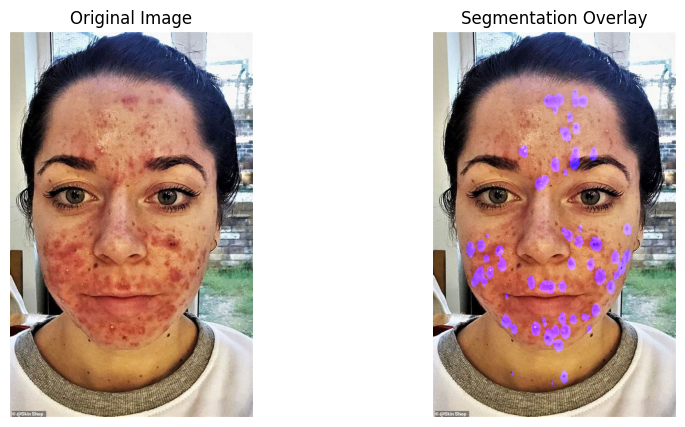

Acne Classification: Level 3: Severe Acne
Confidence: 0.9062


In [51]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
from albumentations import Compose, Normalize, Resize
from albumentations.pytorch import ToTensorV2
from transformers import pipeline  


MODEL_PATH = "Acnes_model.pth"  
MASK_OPACITY = 0.9  
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------- LOAD THE SEGMENTATION MODEL -----------------

model = torch.load(MODEL_PATH)
model.to(DEVICE)
model.eval()  

# ----------------- IMAGE CLASSIFICATION PIPELINE -----------------
classification_pipe = pipeline("image-classification", model="imfarzanansari/skintelligent-acne")

# ----------------- IMAGE PREPROCESSING -----------------
def preprocess_image(image_path, img_size=(256, 256)):
    """
    Load an image, resize it, normalize it, and convert it to a PyTorch tensor.
    """
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

    transform = Compose([
        Resize(*img_size),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])
    
    augmented = transform(image=image)
    tensor_image = augmented["image"].unsqueeze(0) 
    return tensor_image, image  
# ----------------- RUN INFERENCE -----------------
def predict_mask(model, image_tensor):
    """
    Run the trained model on the input image tensor and return the predicted mask.
    """
    with torch.no_grad():
        image_tensor = image_tensor.to(DEVICE)
        output = model(image_tensor)  
        mask = torch.sigmoid(output)  
        mask = mask.squeeze().cpu().numpy()
        return mask

# ----------------- OVERLAY MASK ON IMAGE -----------------
def overlay_mask(image, mask, color=(255, 0, 0), alpha=MASK_OPACITY):
    """
    Overlay the segmentation mask on the original image with transparency.
    Args:
        image (np.array): Original image (H, W, 3)
        mask (np.array): Binary mask (H, W)
        color (tuple): RGB color for mask
        alpha (float): Opacity of mask (0 = transparent, 1 = solid)
    Returns:
        Blended image with mask overlay
    """

    mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    overlay = image.copy()
    mask_colored = np.zeros_like(image, dtype=np.uint8)
    mask_colored[mask_resized == 1] = color 

    blended = cv2.addWeighted(overlay, 1, mask_colored, alpha, 0)
    return blended

# ----------------- MAPPING CLASSIFICATION LABEL TO LEVEL -----------------
def map_classification_label_to_level(label):
    """
    Map the classification label to a corresponding acne severity level.
    """
    levels = {
        'level -1': "Level -1: Clear Skin",
        'level 0': "Level 0: Occasional Spots",
        'level 1': "Level 1: Mild Acne",
        'level 2': "Level 2: Moderate Acne",
        'level 3': "Level 3: Severe Acne",
        'level 4': "Level 4: Very Severe Acne"
    }
    return levels.get(label, "Unknown")

# ----------------- PREDICT AND DISPLAY RESULT -----------------
def process_image(image_path):
    """
    Process the image, predict the mask, and display the results.
    """
    input_tensor, original_image = preprocess_image(image_path)
    
   
    predicted_mask = predict_mask(model, input_tensor)

    binary_predicted_mask = (predicted_mask > 0.2).astype(np.uint8)
    
  
    overlayed_image = overlay_mask(original_image, binary_predicted_mask, color=(0, 0, 255), alpha=MASK_OPACITY)
    

    classification_result = classification_pipe(image_path)
    
    
    predicted_label = max(classification_result, key=lambda x: x['score'])['label']
    predicted_confidence = max(classification_result, key=lambda x: x['score'])['score']
    
    
    acne_severity_level = map_classification_label_to_level(predicted_label)
    
   
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original_image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(overlayed_image)
    ax[1].set_title("Segmentation Overlay")
    ax[1].axis("off")
    
    plt.show()

    print(f"Acne Classification: {acne_severity_level}\nConfidence: {predicted_confidence:.4f}")

# ----------------- IMAGE INPUT -----------------

image_path = "OIP (3).jpg"  
process_image(image_path)

